In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t
from scipy.stats import sem
from scipy.stats import f_oneway
from scipy.stats import ttest_ind
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [2]:
df = pd.read_csv("insurance.csv")

In [3]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [4]:
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [5]:
southwest = df[df['region'] == 'southwest']['bmi']
southeast = df[df['region'] == 'southeast']['bmi']
northwest = df[df['region'] == 'northwest']['bmi']
northeast = df[df['region'] == 'northeast']['bmi']

In [6]:
f_oneway(southwest, southeast, northwest, northeast)

F_onewayResult(statistic=39.49505720170283, pvalue=1.881838913929143e-24)

In [7]:
model = ols('bmi ~ region', data=df).fit()
anova_lm(model, typ=1)

,df,sum_sq,mean_sq,F,PR(>F)
region,3.0,4055.880631,1351.960210,39.495057,1.881839e-24
Residual,1334.0,45664.319755,34.231124,NaN,NaN


In [8]:
regions = df['region'].unique()
regions_bmi = [southwest, southeast, northwest, northeast]
for r1 in range(len(regions)):
    for r2 in range(r1 + 1, len(regions)):
        print(regions[r1], regions[r2])
        print(ttest_ind(regions_bmi[r1], regions_bmi[r2]))

southwest southeast
Ttest_indResult(statistic=-5.908373821545118, pvalue=5.4374009639680636e-09)
southwest northwest
Ttest_indResult(statistic=3.2844171500398582, pvalue=0.001076958496307695)
southwest northeast
Ttest_indResult(statistic=3.1169000930045923, pvalue=0.0019086161671573072)
southeast northwest
Ttest_indResult(statistic=9.25649013552548, pvalue=2.643571405230106e-19)
southeast northeast
Ttest_indResult(statistic=8.790905562598699, pvalue=1.186014937424813e-17)
northwest northeast
Ttest_indResult(statistic=0.060307727183293185, pvalue=0.951929170821864)


group1,group2,meandiff,p-adj,lower,upper,reject
northeast,northwest,0.0263,0.9999,-1.1552,1.2078,False
northeast,southeast,4.1825,-0.0,3.033,5.332,True
northeast,southwest,1.4231,0.0107,0.2416,2.6046,True
northwest,southeast,4.1562,-0.0,3.0077,5.3047,True
northwest,southwest,1.3968,0.0127,0.2162,2.5774,True
southeast,southwest,-2.7594,0.0,-3.9079,-1.6108,True


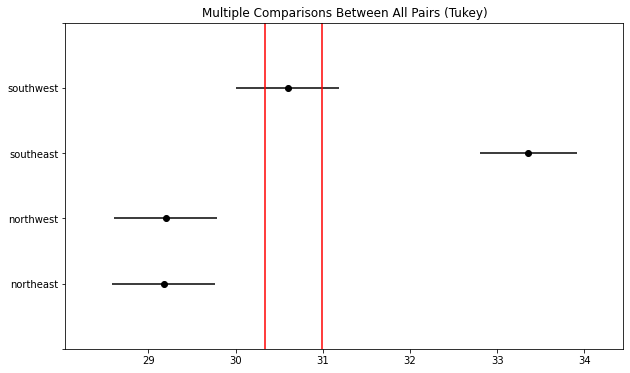

In [9]:
tukey = pairwise_tukeyhsd(endog=df['bmi'], groups=df['region'], alpha=0.05)
tukey.plot_simultaneous()
confidence_interval = t.interval(alpha=0.95, df=len(df['bmi'])-1, loc=np.mean(df['bmi']), scale=sem(df['bmi']))
plt.vlines(x=confidence_interval, ymin=-1, ymax=4, color='red')
tukey.summary()

In [10]:
model2 = ols('bmi ~ C(region) + C(sex) + C(region):C(sex)', data=df).fit()
anova_lm(model2, typ=2)

,sum_sq,df,F,PR(>F)
C(region),4034.975135,3.0,39.398134,2.163195e-24
C(sex),86.007035,1.0,2.519359,1.126940e-01
C(region):C(sex),174.157808,3.0,1.700504,1.650655e-01
Residual,45404.154911,1330.0,NaN,NaN


group1,group2,meandiff,p-adj,lower,upper,reject
northeast / female,northeast / male,-0.2998,0.9998,-2.2706,1.6711,False
northeast / female,northwest / female,-0.0464,1.0,-2.0142,1.9215,False
northeast / female,northwest / male,-0.2042,1.0,-2.1811,1.7728,False
northeast / female,southeast / female,3.3469,0.0,1.41,5.2839,True
northeast / female,southeast / male,4.6657,0.0,2.7634,6.568,True
northeast / female,southwest / female,0.7362,0.9497,-1.2377,2.71,False
northeast / female,southwest / male,1.8051,0.1007,-0.1657,3.776,False
northeast / male,northwest / female,0.2534,0.9999,-1.7083,2.2152,False
northeast / male,northwest / male,0.0956,1.0,-1.8752,2.0665,False
northeast / male,southeast / female,3.6467,0.0,1.7159,5.5775,True


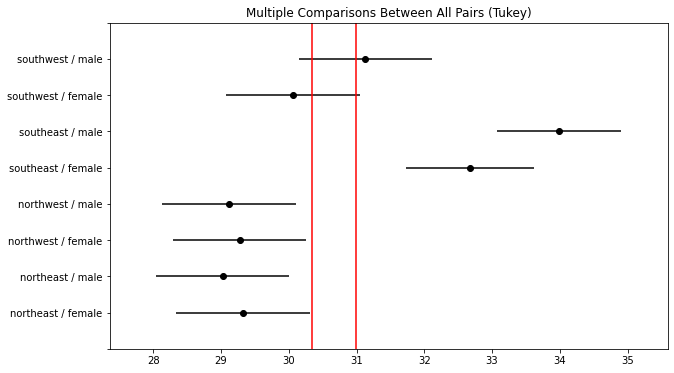

In [11]:
df['combination'] = df['region'] + ' / ' + df['sex']
tukey2 = pairwise_tukeyhsd(endog=df['bmi'], groups=df['combination'], alpha=0.05)
tukey2.plot_simultaneous()
plt.vlines(x=confidence_interval, ymin=-1, ymax=8, color='red')
tukey2.summary()